In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
# data_path = "https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/loan%20aproaval%20DL/loan_approval_dataset.csv"
df = pd.read_csv("loan_approval_dataset.csv",skipinitialspace=True)
df.head()


loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000           8000000    Approved  
1                  2200000              8800000           3300000    Rejected  
2                  4500000             33300000          12800000    Rejected  
3                  3300000             23300000           7900000    Rejected  
4                  8200000             29400000           5000000    Rejected

In [148]:
df.columns[1]


'no_of_dependents'

In [149]:
len(df.columns)

13

In [150]:
df.columns.value_counts()

loan_id                     1
no_of_dependents            1
education                   1
self_employed               1
income_annum                1
loan_amount                 1
loan_term                   1
cibil_score                 1
residential_assets_value    1
commercial_assets_value     1
luxury_assets_value         1
bank_asset_value            1
loan_status                 1
Name: count, dtype: int64

In [151]:
# for i in range(len(df.columns)) :
#     df.columns[i]=df.columns[i].strip()

In [152]:
df['cibil_score'].mean()

599.9360505973295

In [153]:
df['self_employed'].value_counts()

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [154]:
business_man = df[df['self_employed']=='Yes']
salaried_person = df[df['self_employed']=='No']

In [155]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [156]:
salaried_person['loan_status'].value_counts()

loan_status
Approved    1318
Rejected     801
Name: count, dtype: int64

In [157]:
business_man['loan_status'].value_counts()

loan_status
Approved    1338
Rejected     812
Name: count, dtype: int64

In [158]:
less_score = df[df['cibil_score']<=df['cibil_score'].mean()]
less_score.head()

loan_id  no_of_dependents     education self_employed  income_annum  \
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   
5        6                 0      Graduate           Yes       4800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   
5     13500000         10          319                   6800000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
1                  2200000              8800000           3300000    Rejected  
2                  4500000             33300000          12800000    Rejected  
3                  3300000             23300000           7900000    Rejected  
4                  8200000             29400000           5000000    Rejected  
5                  8300000             13700000           5100000    Rejected

In [159]:
less_score['loan_status'].value_counts()

loan_status
Rejected    1602
Approved     531
Name: count, dtype: int64

In [160]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

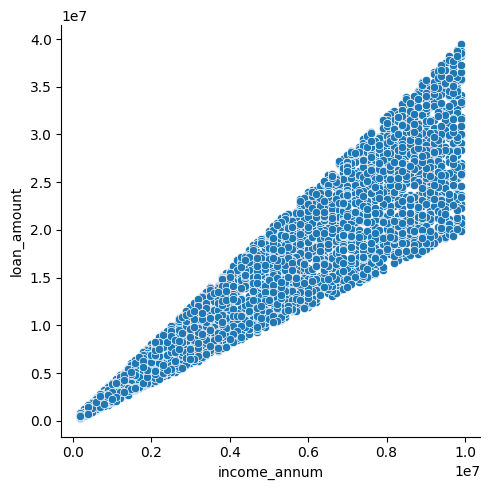

In [161]:
sns.relplot(x='income_annum',y='loan_amount',data=df)
plt.show()

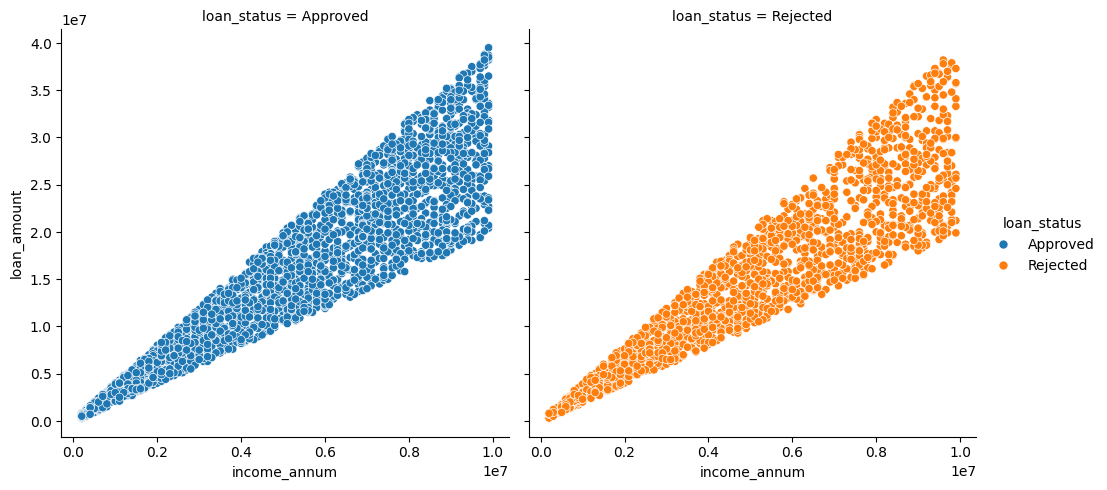

In [162]:
sns.relplot(x='income_annum',y='loan_amount',data=df,hue='loan_status',col='loan_status')
plt.show()

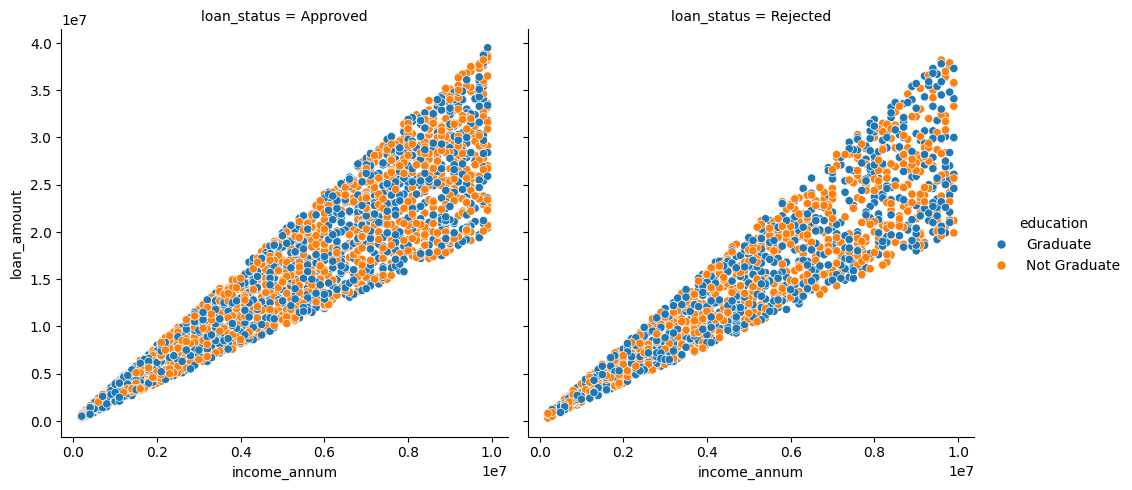

In [163]:
sns.relplot(x='income_annum',y='loan_amount',data=df,hue='education',col='loan_status')
plt.show()

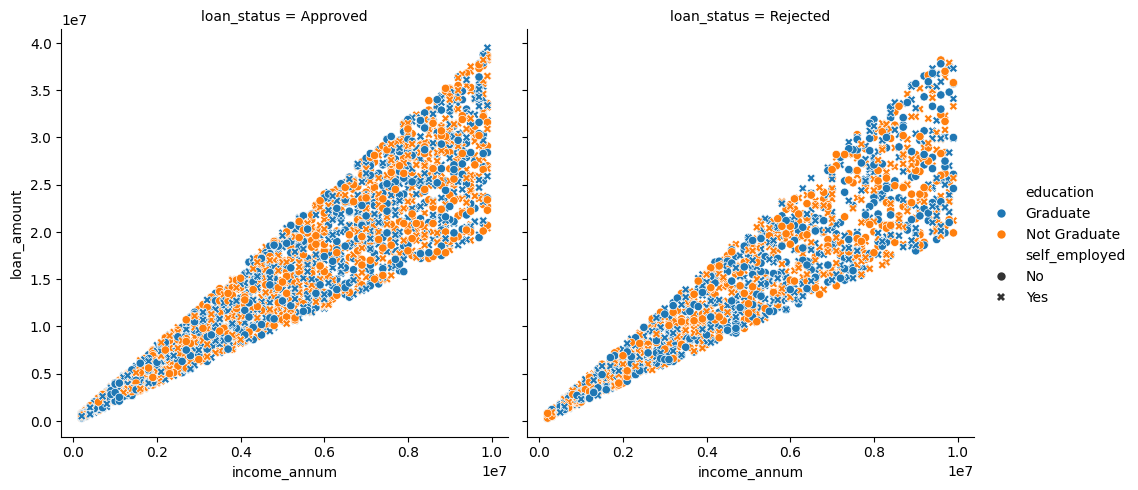

In [164]:
sns.relplot(x='income_annum',y='loan_amount',data=df,hue='education',col='loan_status',style='self_employed')
plt.show()

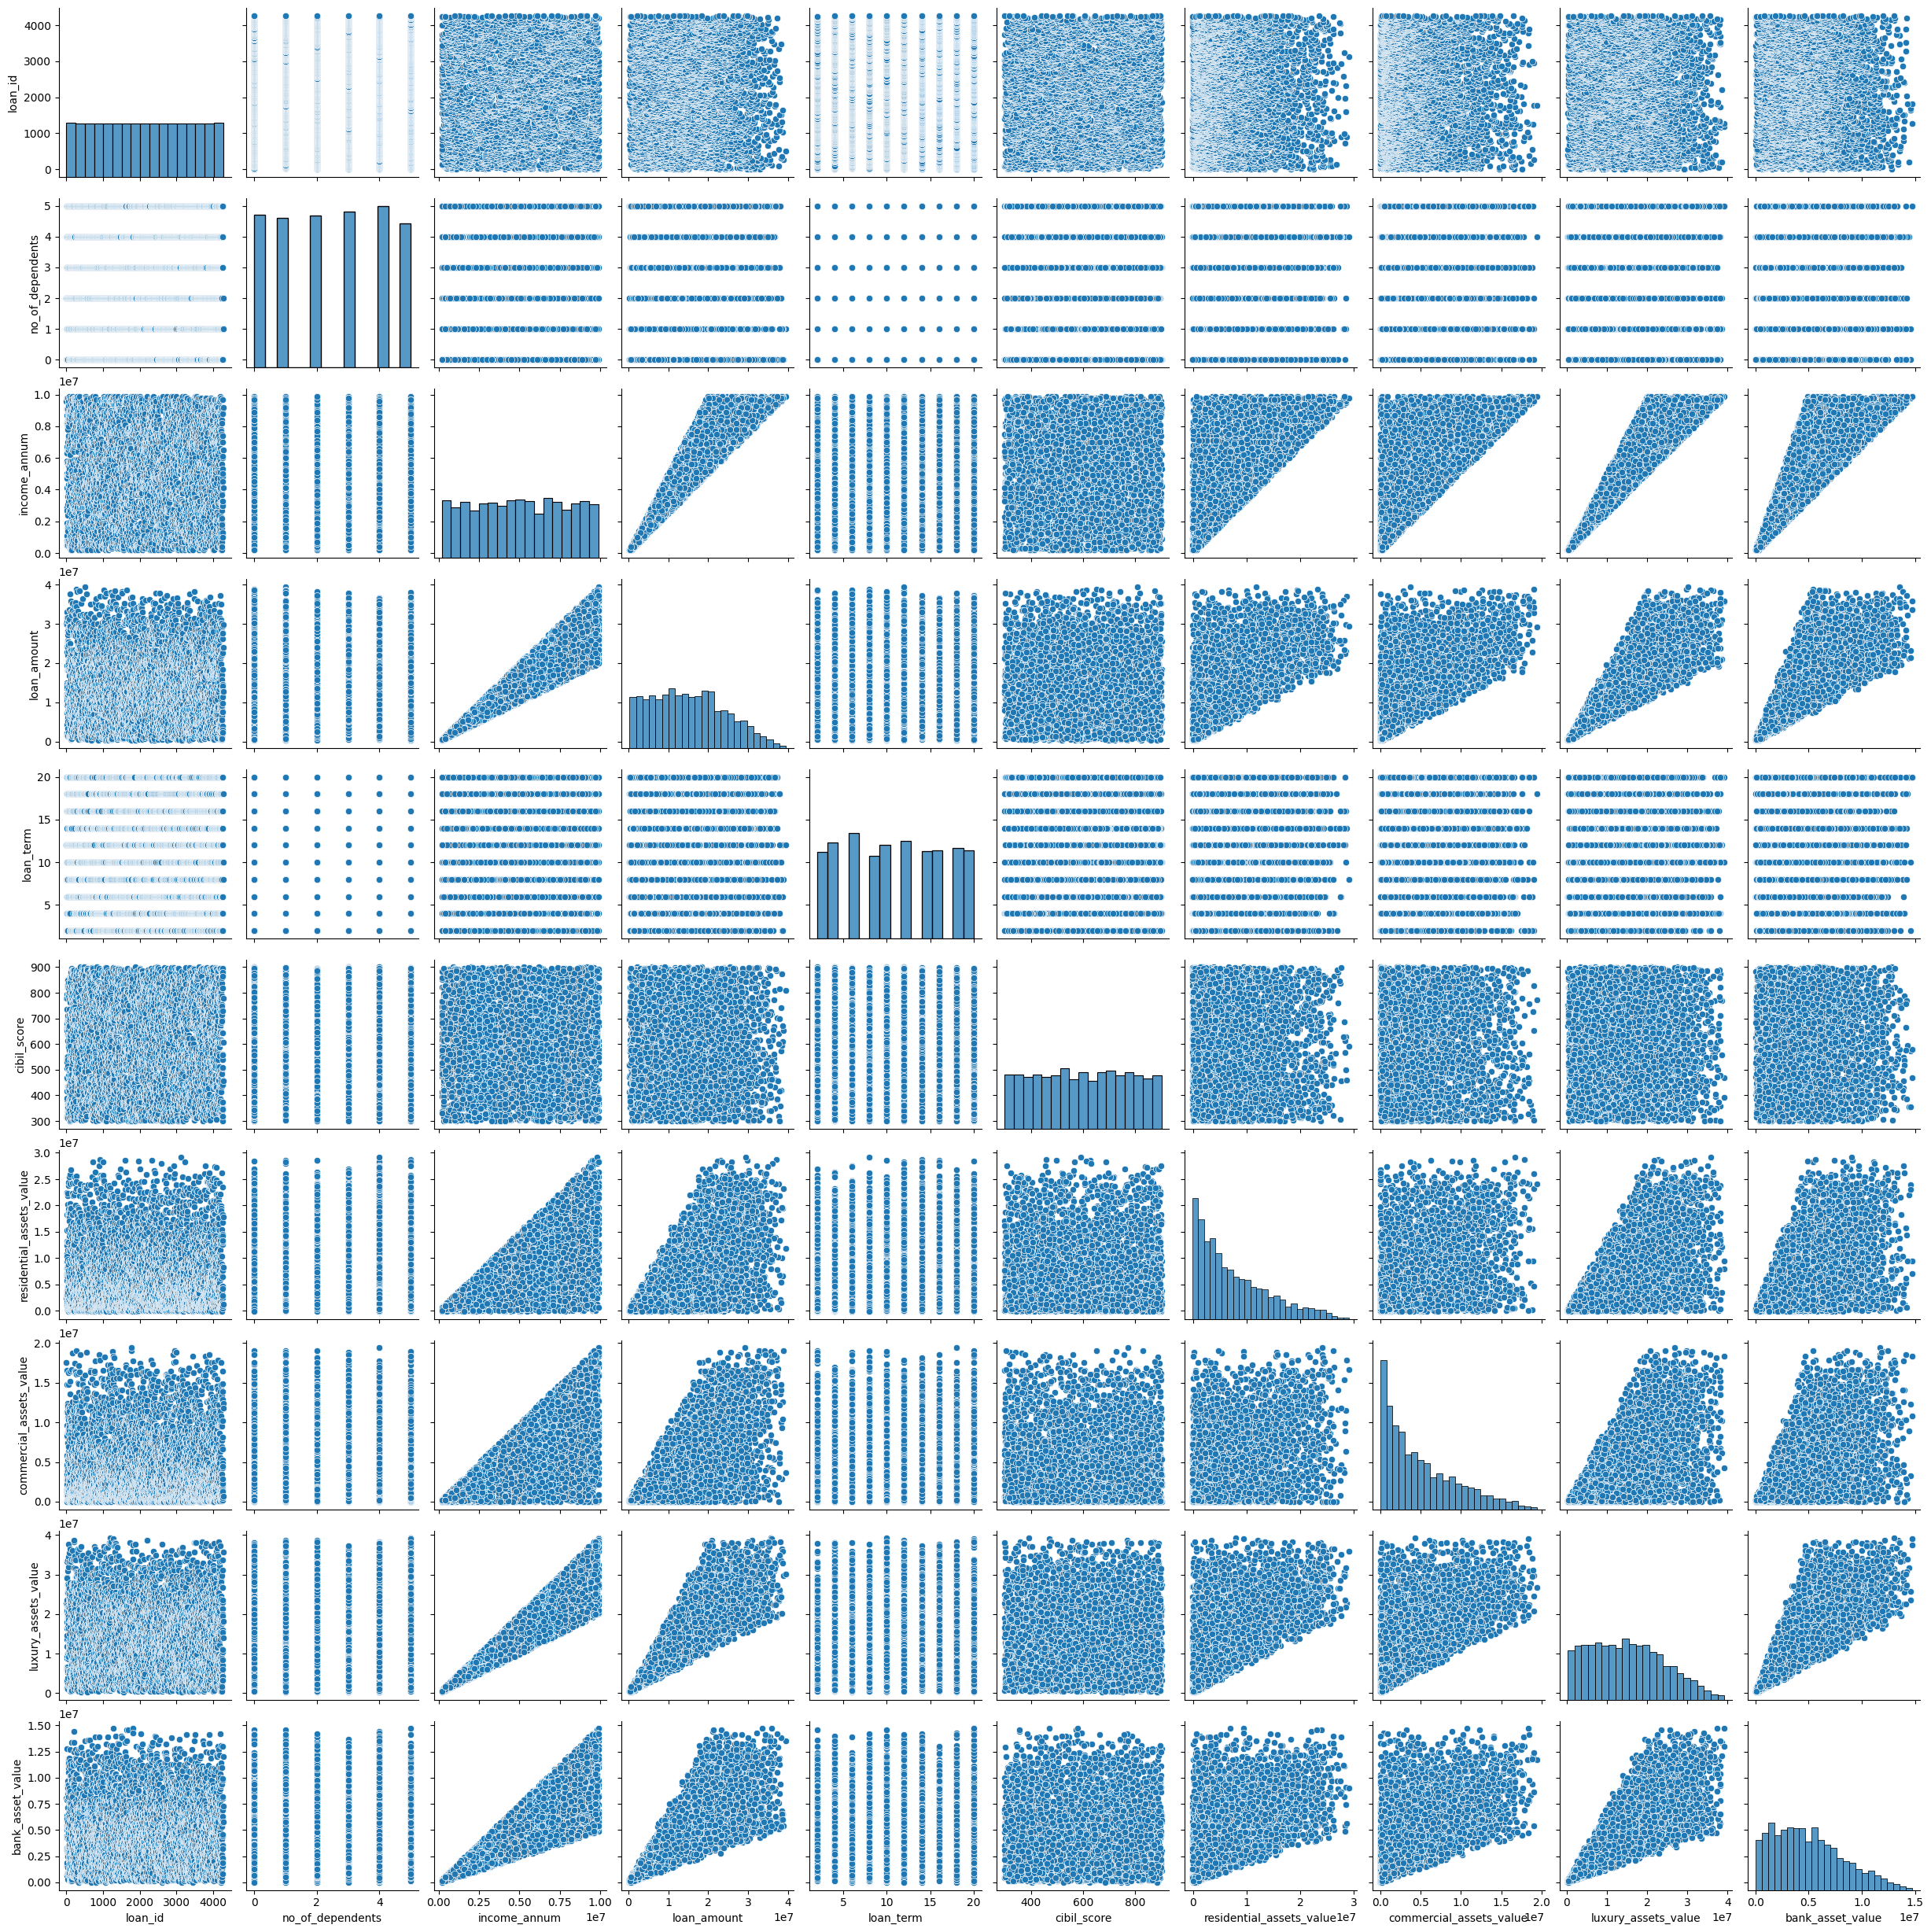

In [165]:
sns.pairplot(df)

In [166]:
df2 = pd.get_dummies(df,dtype=int,drop_first=True)

# pd.get_dummies(df,drop_first='if_binary').astype(int)
df2.head()

loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
0        1                 2       9600000     29900000         12   
1        2                 0       4100000     12200000          8   
2        3                 3       9100000     29700000         20   
3        4                 3       8200000     30700000          8   
4        5                 5       9800000     24200000         20   

   cibil_score  residential_assets_value  commercial_assets_value  \
0          778                   2400000                 17600000   
1          417                   2700000                  2200000   
2          506                   7100000                  4500000   
3          467                  18200000                  3300000   
4          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  education_Not Graduate  \
0             22700000           8000000                       0   
1              8800000           3300000                       1   
2             33300000          12800000                       0   
3             23300000           7900000                       0   
4             29400000           5000000                       1   

   self_employed_Yes  loan_status_Rejected  
0                  0                     0  
1                  1                     1  
2                  0                     1  
3                  0                     1  
4                  1                     1

In [167]:
df2.drop('loan_id',axis='columns',inplace=True)

In [168]:
df2.head()

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                 2       9600000     29900000         12          778   
1                 0       4100000     12200000          8          417   
2                 3       9100000     29700000         20          506   
3                 3       8200000     30700000          8          467   
4                 5       9800000     24200000         20          382   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   2700000                  2200000              8800000   
2                   7100000                  4500000             33300000   
3                  18200000                  3300000             23300000   
4                  12400000                  8200000             29400000   

   bank_asset_value  education_Not Graduate  self_employed_Yes  \
0           8000000                       0                  0   
1           3300000                       1                  1   
2          12800000                       0                  0   
3           7900000                       0                  0   
4           5000000                       1                  1   

   loan_status_Rejected  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1

In [169]:
x=df2.drop('loan_status_Rejected',axis='columns')
y= df2[['loan_status_Rejected']]


In [170]:
x.head()

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                 2       9600000     29900000         12          778   
1                 0       4100000     12200000          8          417   
2                 3       9100000     29700000         20          506   
3                 3       8200000     30700000          8          467   
4                 5       9800000     24200000         20          382   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   2700000                  2200000              8800000   
2                   7100000                  4500000             33300000   
3                  18200000                  3300000             23300000   
4                  12400000                  8200000             29400000   

   bank_asset_value  education_Not Graduate  self_employed_Yes  
0           8000000                       0                  0  
1           3300000                       1                  1  
2          12800000                       0                  0  
3           7900000                       0                  0  
4           5000000                       1                  1

In [171]:
y.head()

loan_status_Rejected
0                     0
1                     1
2                     1
3                     1
4                     1

In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_transformed = scaler.fit_transform(x)

In [173]:
x_transformed

array([[-0.2941017 ,  1.61797904,  1.63305171, ...,  0.93030441,
        -0.99555917, -1.00728821],
       [-1.4735476 , -0.34174956, -0.32441406, ..., -0.51593638,
         1.00446064,  0.99276452],
       [ 0.29562125,  1.4398219 ,  1.61093345, ...,  2.40731629,
        -0.99555917, -1.00728821],
       ...,
       [-0.2941017 ,  0.51340474,  0.96950399, ...,  0.71490685,
         1.00446064, -1.00728821],
       [-0.88382465, -0.34174956, -0.25805929, ...,  0.25334064,
         1.00446064, -1.00728821],
       [-0.88382465,  1.47545332,  1.61093345, ...,  2.16114764,
        -0.99555917, -1.00728821]])

In [174]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_transformed,y,test_size=0.15)

In [175]:
x_train.shape

(3628, 11)

In [176]:
x_test.shape

(641, 11)

In [177]:
y

loan_status_Rejected
0                        0
1                        1
2                        1
3                        1
4                        1
...                    ...
4264                     1
4265                     0
4266                     1
4267                     0
4268                     0

[4269 rows x 1 columns]

In [178]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
rdf.fit(x_train,y_train)
print(rdf.score(x_train,y_train)*100)
print(rdf.score(x_test,y_test)*100)

100.0
98.4399375975039


In [179]:
import os, joblib

In [181]:
os.makedirs('Models',exist_ok=True)

In [199]:
# joblib.dump('./Models/RandomForestClassifier_Model',rdf)

In [182]:
x_train.shape

(3628, 11)

In [183]:
import warnings 
warnings.filterwarnings('ignore')

In [184]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ANN_model = Sequential()

ANN_model.add(Dense(units=68, activation='relu', input_dim = 11))  # 1 hidden layer with input layer
ANN_model.add(Dense(units=32,activation='relu'))  # 2 hidden layer
ANN_model.add(Dense(units=16,activation='relu'))  # 3 hidden layer

ANN_model.add(Dense(units=1,activation='sigmoid'))  # 4 output layer


ANN_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

ANN_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 68)             │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,569 (13.94 KB)

 Trainable params: 3,569 (13.94 KB)

 Non-trainable params: 0 (0.00 B)

In [186]:
history = ANN_model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9617 - loss: 0.1066 - val_accuracy: 0.9548 - val_loss: 0.1087
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9724 - loss: 0.0887 - val_accuracy: 0.9579 - val_loss: 0.1116
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9608 - loss: 0.1023 - val_accuracy: 0.9626 - val_loss: 0.1020
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9738 - loss: 0.0821 - val_accuracy: 0.9579 - val_loss: 0.0979
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9732 - loss: 0.0737 - val_accuracy: 0.9610 - val_loss: 0.0971
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9753 - loss: 0.0752 - val_accuracy: 0.9610 - val_loss: 0.0977
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9758 - loss: 0.0719 - val_accuracy: 0.9641 - val_loss: 0.0990
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9767 - loss: 0.0689 - val_accuracy: 0.

In [187]:
pd.DataFrame(history.history)

accuracy      loss  val_accuracy  val_loss
0  0.964168  0.101560      0.954758  0.108696
1  0.967200  0.096628      0.957878  0.111623
2  0.966097  0.092625      0.962559  0.101988
3  0.971334  0.085384      0.957878  0.097893
4  0.969405  0.081745      0.960998  0.097150
5  0.973815  0.075207      0.960998  0.097686
6  0.974366  0.073528      0.964119  0.098958
7  0.974090  0.071884      0.970359  0.079182
8  0.978776  0.063968      0.965679  0.085349
9  0.979879  0.059922      0.965679  0.078558

In [190]:
history_df = pd.DataFrame(history.history,index=range(1,11))
history_df


accuracy      loss  val_accuracy  val_loss
1   0.964168  0.101560      0.954758  0.108696
2   0.967200  0.096628      0.957878  0.111623
3   0.966097  0.092625      0.962559  0.101988
4   0.971334  0.085384      0.957878  0.097893
5   0.969405  0.081745      0.960998  0.097150
6   0.973815  0.075207      0.960998  0.097686
7   0.974366  0.073528      0.964119  0.098958
8   0.974090  0.071884      0.970359  0.079182
9   0.978776  0.063968      0.965679  0.085349
10  0.979879  0.059922      0.965679  0.078558

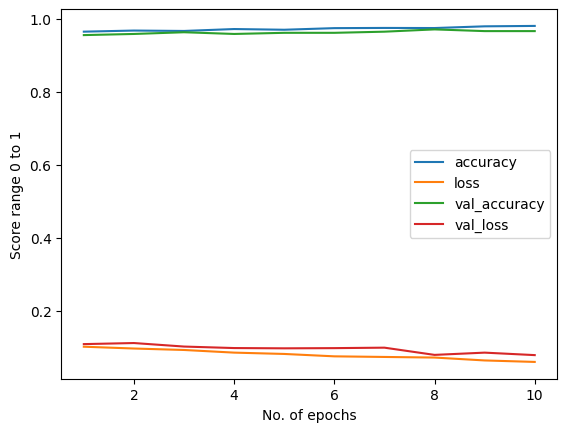

In [191]:
history_df.plot()
plt.xlabel('No. of epochs')
plt.ylabel('Score range 0 to 1')
plt.show()

In [192]:
prediction = ANN_model.predict(x_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [193]:
prediction.shape , x_test.shape

((641, 1), (641, 11))

In [194]:
prediction

array([[2.15587661e-01],
       [7.57883186e-04],
       [3.44000268e-03],
       [7.65879452e-03],
       [1.09045743e-03],
       [1.92308333e-04],
       [5.29672761e-05],
       [9.99286711e-01],
       [9.79121745e-01],
       [1.00000000e+00],
       [9.99999285e-01],
       [4.19136276e-03],
       [9.92134690e-01],
       [2.47712694e-02],
       [9.99992490e-01],
       [1.00000000e+00],
       [1.22506544e-02],
       [1.04536831e-01],
       [1.00000000e+00],
       [1.53325236e-04],
       [1.82742360e-06],
       [6.33578539e-01],
       [9.99975085e-01],
       [2.34315503e-05],
       [1.00000000e+00],
       [9.99946713e-01],
       [9.99999285e-01],
       [1.72652683e-04],
       [3.91680544e-04],
       [2.01680046e-03],
       [9.99999881e-01],
       [6.76063299e-02],
       [5.96580096e-03],
       [9.47533727e-01],
       [3.42268944e-02],
       [9.93972600e-01],
       [1.00000000e+00],
       [6.97463576e-04],
       [1.26372762e-02],
       [6.38771951e-01],


In [195]:
prediction = (prediction>0.5).astype(int).ravel()
prediction
 #if prob > 0.5 :
    # print(1)

#else:
    #print(0)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [196]:
y_test['prediction'] = prediction

In [198]:
y_test.head(40)

loan_status_Rejected  prediction
4075                     0           0
1246                     0           0
1741                     0           0
1777                     0           0
3650                     0           0
654                      0           0
3857                     0           0
936                      1           1
2029                     1           1
3270                     1           1
2507                     1           1
2469                     0           0
3146                     1           1
1676                     0           0
649                      1           1
3201                     1           1
3783                     0           0
1146                     0           0
1820                     1           1
3188                     0           0
442                      0           0
2524                     1           1
1335                     1           1
2589                     0           0
3164                     1           1
2584                     1           1
212                      1           1
3948                     0           0
269                      0           0
3943                     0           0
2542                     1           1
785                      0           0
1450                     0           0
1491                     1           1
2139                     0           0
2054                     1           1
3334                     1           1
186                      0           0
2629                     0           0
3340                     1           1

In [ ]:

# matrix = confusion
# sns.heatmap(matrix,annot=True,fmt='d')

In [200]:
ANN_model.save('./Models/ann_model.h5')   # .h5 tensorflow save , .pt pytorch

load model the tensor flow model or objects

In [202]:
from tensorflow.keras.models import load_model
model_loaded = load_model('./Models/ann_model.h5')

In [205]:
pd.DataFrame(model_loaded.history)

AttributeError: 'Sequential' object has no attribute 'history'